# Pre process

In [4]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("../Data/diamonds.csv")

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True) # Drop the colum with index values

In [10]:
X=df


## Categorical data handling
- because no data description given let us assuem thet all calegorical features are nominal

In [15]:
df.shape

(53940, 10)

In [13]:
df_ohe=pd.get_dummies(df,columns=["cut","color","clarity"])

In [16]:
df_ohe.shape

(53940, 27)

In [18]:
df_ohe.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

# Checking the missing values

In [31]:
df_ohe.isnull().sum()

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

# Remove duplicate rows

In [29]:
df_ohe.shape

(53794, 27)

In [27]:
df_ohe.drop_duplicates(inplace=True)

In [28]:
df_ohe.shape

(53794, 27)

# Scale The Data
- k - means ---> Scaling is not recommended
- dbscane -> scaling is compulsory

In [32]:
df_ohe.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
df_ohe_std=(df_ohe-df_ohe.mean())/df_ohe.std()

In [34]:
df_ohe_std.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,...,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04
mean,8.876171e-17,-1.100407e-15,-4.966429e-17,4.226748e-17,1.479362e-17,9.383380e-16,-9.087508e-17,5.389104e-17,1.849202e-17,-9.721520e-17,...,-9.510183e-17,2.324711e-17,-5.283435e-18,-6.815631e-17,-5.706110e-17,5.811778e-17,3.381398e-17,-5.283435e-17,-2.324711e-17,4.226748e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.262764e+00,-1.311138e+01,-6.472778e+00,-9.044538e-01,-5.113984e+00,-5.025068e+00,-5.019185e+00,-1.749709e-01,-3.162475e-01,-8.155533e-01,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-2.696754e-01,-3.220814e-01
25%,-8.402794e-01,-5.231659e-01,-6.527834e-01,-7.477381e-01,-9.112334e-01,-8.891037e-01,-8.917449e-01,-1.749709e-01,-3.162475e-01,-8.155533e-01,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-2.696754e-01,-3.220814e-01
50%,-2.065527e-01,3.631020e-02,-2.050916e-01,-3.841578e-01,-2.785277e-02,-2.160279e-02,-1.235908e-02,-1.749709e-01,-3.162475e-01,-8.155533e-01,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-2.696754e-01,-3.220814e-01
75%,5.116708e-01,5.258518e-01,6.902922e-01,3.494596e-01,7.216823e-01,7.056959e-01,6.968231e-01,-1.749709e-01,-3.162475e-01,1.226139e+00,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-2.696754e-01,-3.220814e-01
max,8.897986e+00,1.206505e+01,1.680720e+01,3.733578e+00,4.469358e+00,4.658685e+01,4.008480e+01,5.715131e+00,3.162022e+00,1.226139e+00,...,2.991453e+00,4.265922e+00,8.467187e+00,5.399356e+00,1.768553e+00,2.208854e+00,2.365487e+00,1.843590e+00,3.708093e+00,3.104747e+00


In [39]:
# Another syntex for standerd deviance
df_ohe_std1=df_ohe.copy()
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
sd.fit(df_ohe)
df_ohe_std1.iloc[:,:]=sd.transform(df_ohe)

/var/folders/pp/vsc9g0zn3knb2rtnlyrv1k_m0000gn/T/ipykernel_5158/424151835.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.90446216 -0.90446216 -0.90421141 ... -0.29489525 -0.29489525
 -0.29489525]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_ohe_std1.iloc[:,:]=sd.transform(df_ohe)
/var/folders/pp/vsc9g0zn3knb2rtnlyrv1k_m0000gn/T/ipykernel_5158/424151835.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.17497249 -0.17497249 -0.17497249 ... -0.17497249 -0.17497249
 -0.17497249]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_ohe_std1.iloc[:,:]=sd.transform(df_ohe)
/var/folders/pp/vsc9g0zn3knb2rtnlyrv1k_m0000gn/T/ipykernel_5158/424151835.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

In [40]:
df_ohe_std1

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.199402,-0.173495,-1.100486,-0.904462,-1.589399,-1.537553,-1.572574,-0.174972,-0.316250,1.226150,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084
1,-1.241651,-1.362393,1.585691,-0.904462,-1.642938,-1.660231,-1.742780,-0.174972,-0.316250,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
2,-1.199402,-3.390512,3.376475,-0.904211,-1.500168,-1.458689,-1.742780,-0.174972,3.162051,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,-0.452719,2.365509,-0.542415,-0.269678,-0.322084
3,-1.072656,0.455922,0.242603,-0.902456,-1.366321,-1.318485,-1.288899,-0.174972,-0.316250,-0.815561,...,2.991480,-0.234414,-0.118102,-0.185206,-0.565429,-0.452719,-0.422742,1.843607,-0.269678,-0.322084
4,-1.030407,1.085338,0.242603,-0.902205,-1.241397,-1.213332,-1.118694,-0.174972,3.162051,-0.815561,...,-0.334283,4.265962,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164306,-0.663041,-0.205093,-0.294895,0.016763,0.022211,-0.054911,-0.174972,-0.316250,1.226150,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
53936,-0.164306,0.945468,-1.100486,-0.294895,-0.036776,0.013448,0.101111,-0.174972,3.162051,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
53937,-0.206555,0.735662,1.137995,-0.294895,-0.063546,-0.047891,0.030192,-0.174972,-0.316250,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
53938,0.131436,-0.523171,0.242603,-0.294895,0.373687,0.337668,0.285500,-0.174972,-0.316250,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084


# Detect Outliers Using DBSCAN
- We need standers scaled data
- and clean data (No string columns are allowed)

In [41]:
X=df_ohe_std

In [44]:
X.shape

(53794, 27)

# Find the appropiate eps value Knee MEthod

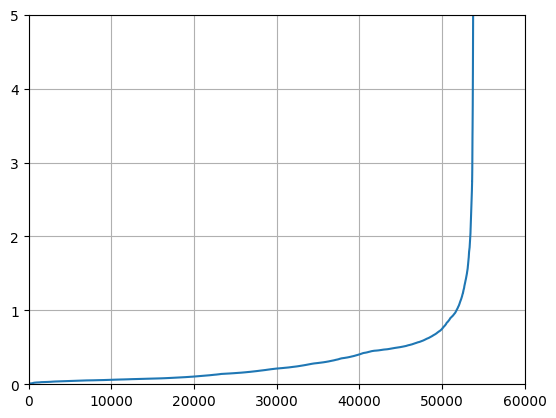

In [76]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.axis([0, 60000, 0, 5])
distances = distances[:,1]
plt.plot(distances)
plt.grid()

In [45]:
from sklearn.cluster import DBSCAN


In [69]:
dbs=DBSCAN(eps=2,min_samples=10)
y_pred=dbs.fit_predict(X)



In [70]:
X.shape, y_pred.shape

((53794, 27), (53794,))

In [71]:
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))


Number of clusters: 238
Outliers : 1400


In [ ]:
len(y_pred[np.where(y_pred == -1)])/y_pred.shape[0]*100 #Finding out the perrencage of outliers

2.602520727218649

### After dbscan conclusion is we have 1400 outliars detected we can remove them / impute as neccessary

# Statical Method to get detect outliers

### after standard scaller our assumption is 99% data is -3 to +3 
- so values  less then -3 and greater the +3 are considered as outliers
- we are going to impute the outliers
- when value < -3 replace with -3
- when value > +3 replace with +3

write a code to perform impute operation on every column one by one


In [80]:
df_ohe_std[:][:]>3

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.199402,-0.173495,-1.100486,-0.904462,-1.589399,-1.537553,-1.572574,-0.174972,-0.316250,1.226150,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084
1,-1.241651,-1.362393,1.585691,-0.904462,-1.642938,-1.660231,-1.742780,-0.174972,-0.316250,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
2,-1.199402,-3.390512,3.376475,-0.904211,-1.500168,-1.458689,-1.742780,-0.174972,3.162051,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,-0.452719,2.365509,-0.542415,-0.269678,-0.322084
3,-1.072656,0.455922,0.242603,-0.902456,-1.366321,-1.318485,-1.288899,-0.174972,-0.316250,-0.815561,...,2.991480,-0.234414,-0.118102,-0.185206,-0.565429,-0.452719,-0.422742,1.843607,-0.269678,-0.322084
4,-1.030407,1.085338,0.242603,-0.902205,-1.241397,-1.213332,-1.118694,-0.174972,3.162051,-0.815561,...,-0.334283,4.265962,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164306,-0.663041,-0.205093,-0.294895,0.016763,0.022211,-0.054911,-0.174972,-0.316250,1.226150,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
53936,-0.164306,0.945468,-1.100486,-0.294895,-0.036776,0.013448,0.101111,-0.174972,3.162051,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
53937,-0.206555,0.735662,1.137995,-0.294895,-0.063546,-0.047891,0.030192,-0.174972,-0.316250,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,1.768570,-0.452719,-0.422742,-0.542415,-0.269678,-0.322084
53938,0.131436,-0.523171,0.242603,-0.294895,0.373687,0.337668,0.285500,-0.174972,-0.316250,-0.815561,...,-0.334283,-0.234414,-0.118102,-0.185206,-0.565429,2.208874,-0.422742,-0.542415,-0.269678,-0.322084


# Function for outlier implication using STD

In [ ]:
#Function to impute outlier
def impute_outlier_std(df,col):
    df.loc[df[col]>3,col]=3
    df.loc[df[col]<-3,col]=-3
    return df

In [84]:
df_impute=df_ohe_std.copy()
for col in df_impute.columns:
    df_impute=impute_outlier_std(df_impute,col)

In [86]:
df_impute.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,5.379400e+04,...,5.379400e+04,53794.000000,53794.000000,53794.000000,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,53794.000000,53794.000000
mean,-0.004130,-0.002251,-0.005480,-0.007745,0.000038,-0.001114,-0.000309,-0.080655,-0.014731,-9.721520e-17,...,-9.510183e-17,-0.065939,-0.075208,-0.079571,-5.706110e-17,5.811778e-17,3.381398e-17,-5.283435e-17,-0.048006,-0.009845
std,0.984551,0.952092,0.976128,0.974575,0.998092,0.973350,0.980811,0.539035,0.953419,1.000000e+00,...,1.000000e+00,0.718705,0.363191,0.570359,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.821987,0.969433
min,-1.262764,-3.000000,-3.000000,-0.904454,-3.000000,-3.000000,-3.000000,-0.174971,-0.316247,-8.155533e-01,...,-3.342795e-01,-0.234412,-0.118101,-0.185204,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
25%,-0.840279,-0.523166,-0.652783,-0.747738,-0.911233,-0.889104,-0.891745,-0.174971,-0.316247,-8.155533e-01,...,-3.342795e-01,-0.234412,-0.118101,-0.185204,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
50%,-0.206553,0.036310,-0.205092,-0.384158,-0.027853,-0.021603,-0.012359,-0.174971,-0.316247,-8.155533e-01,...,-3.342795e-01,-0.234412,-0.118101,-0.185204,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
75%,0.511671,0.525852,0.690292,0.349460,0.721682,0.705696,0.696823,-0.174971,-0.316247,1.226139e+00,...,-3.342795e-01,-0.234412,-0.118101,-0.185204,-5.654234e-01,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.226139e+00,...,2.991453e+00,3.000000,3.000000,3.000000,1.768553e+00,2.208854e+00,2.365487e+00,1.843590e+00,3.000000,3.000000


# Function for outlier detection using IQR

In [90]:
def impute_outlier_iqr(df,col):
    q1,q3=df[col].quantile([0.25,0.75])
    iqr=q3-q1
    lower_bound=q1-1.5*(iqr)
    upper_bound=q3+1.5*(iqr)
    df.loc[df[col]>upper_bound,col]=upper_bound
    df.loc[df[col]<lower_bound,col]=lower_bound
    return df

In [91]:
df_imput_iqr=df_ohe_std.copy()
for col in df_imput_iqr.columns:
    df_imput_iqr=impute_outlier_iqr(df_imput_iqr,col)

df_imput_iqr.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,5.379400e+04,5.379400e+04,5.379400e+04,...,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,53794.000000,5.379400e+04,5.379400e+04,5.379400e+04,53794.000000,53794.000000
mean,-0.011216,0.000023,-0.008281,-0.050177,0.000082,-0.001100,-0.000369,-1.749709e-01,-3.162475e-01,-9.721520e-17,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
std,0.964730,0.887918,0.967457,0.861738,0.998522,0.973594,0.981272,5.551167e-17,5.551167e-17,1.000000e+00,...,1.110233e-16,1.110233e-16,4.163375e-17,2.775583e-17,0.000000,1.665350e-16,5.551167e-17,2.220467e-16,0.000000,0.000000
min,-1.262764,-2.096692,-2.667397,-0.904454,-3.360607,-3.281303,-3.274597,-1.749709e-01,-3.162475e-01,-8.155533e-01,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
25%,-0.840279,-0.523166,-0.652783,-0.747738,-0.911233,-0.889104,-0.891745,-1.749709e-01,-3.162475e-01,-8.155533e-01,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
50%,-0.206553,0.036310,-0.205092,-0.384158,-0.027853,-0.021603,-0.012359,-1.749709e-01,-3.162475e-01,-8.155533e-01,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
75%,0.511671,0.525852,0.690292,0.349460,0.721682,0.705696,0.696823,-1.749709e-01,-3.162475e-01,1.226139e+00,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
max,2.539596,2.099378,2.704906,1.995256,3.171056,3.097895,3.079675,-1.749709e-01,-3.162475e-01,1.226139e+00,...,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081


# K-means Clustering
- we will train test split beacause kmeans can do prediction on unseen data
- don't use standardised dataa in k-mean
- FInalize the k uinng l-bow method
- apply kmean

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(df_ohe,test_size=0.3,random_state=7)

In [116]:
from sklearn.cluster import KMeans

In [117]:
inertia_values = []
for k in range(2,11):
    km = KMeans(n_clusters = k, random_state=7)
    km.fit(X_train)
    inertia_values.append(km.inertia_)


inertia_values

[171218171171.40958,
 72302697030.86038,
 39994223894.97007,
 26161424269.360153,
 17623221470.783775,
 12598549465.568092,
 9840172782.300243,
 7692449700.551351,
 6320294332.461053]

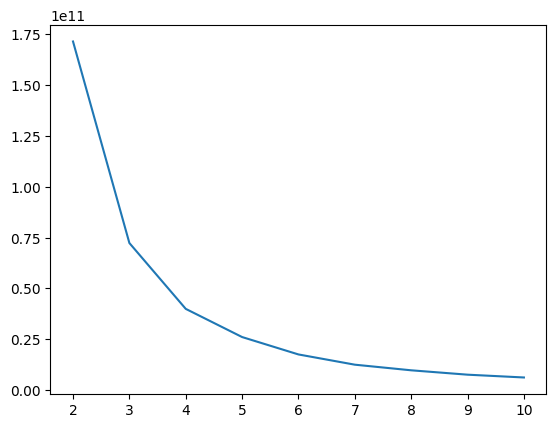

In [118]:
from matplotlib import pyplot as plt
plt.plot(range(2,11), inertia_values)

In [146]:
from sklearn.cluster import KMeans
mk = KMeans(4,random_state=8)
mk.fit(X_train)
y_pred=mk.predict(X_test)
y_pred

array([1, 1, 3, ..., 2, 1, 1], dtype=int32)

In [114]:
df_ohe

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


# Evaluation of data 


In [124]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,y_pred)

np.float64(0.6515874615255091)

In [ ]:
# gind the cluster numer in data
set(y_pred)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

In [131]:
len(y_pred[y_pred==0])



4193

In [132]:
len(y_pred[y_pred==1])


1003

In [133]:
len(y_pred[y_pred==2])

9086

# PCA

In [147]:

from sklearn.decomposition import PCA
pca=PCA(random_state=7)
pca.fit(df_ohe)
transform_data=pca.transform(df_ohe)
df_trans=pd.DataFrame(transform_data, index=df_ohe.index)
df_trans.head()


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-3607.066075,-2.168482,-0.998447,-0.962132,-0.098012,0.015493,-0.151110,-0.185717,-0.789763,0.875579,...,0.187849,0.055420,-0.133824,0.145795,-0.017057,0.137265,0.007243,-1.037892e-11,3.973753e-11,4.332673e-11
1,-3607.065702,4.161833,-0.983068,-1.603857,0.333288,0.834471,0.618046,-0.407077,-0.017930,0.651789,...,0.138680,0.024270,-0.061763,0.105004,-0.003768,0.130928,0.057328,-1.109790e-11,4.257831e-11,4.642897e-11
2,-3606.065321,8.716483,-2.666152,-1.658444,-0.000018,0.226599,-0.836851,-0.003984,-0.443978,0.674659,...,0.072382,-0.044237,-0.016534,0.103081,0.031494,0.121988,0.095954,-1.256606e-11,4.903628e-11,5.356715e-11
3,-3599.065679,0.614129,0.752550,-1.014690,-0.533762,-0.336973,0.848607,-0.427346,0.282559,-0.093408,...,0.045592,0.104669,-0.106593,0.063750,0.017065,0.083411,-0.011605,4.818368e-14,-3.965647e-13,-4.635181e-13
4,-3598.065598,0.345343,1.722028,-0.662789,-0.154466,-0.083630,-0.063408,0.141539,-0.623789,0.146754,...,1.154607,0.201873,-0.243018,0.103113,0.032581,0.119361,-0.160058,4.660161e-12,-1.779048e-11,-1.939832e-11


In [148]:
pca.components_[0]

array([ 1.09388024e-04, -3.96101193e-06,  7.08876638e-05,  9.99999918e-01,
        2.48553295e-04,  2.47635063e-04,  1.52248316e-04,  7.63698297e-07,
       -7.97113583e-08, -1.18120175e-05,  1.04516221e-05,  6.76408436e-07,
       -5.98950584e-06, -9.75173464e-06, -2.29566161e-06,  8.98860060e-07,
        5.31552873e-06,  7.25933410e-06,  4.56317921e-06, -6.73651572e-09,
       -2.21544567e-06,  9.61126287e-07,  1.20247838e-05, -8.71802632e-07,
       -7.60915924e-08, -5.99518884e-06, -3.82064481e-06])

In [ ]:
# How much data is explainedd by the component of the principal
pca.explained_variance_ratio_ * 100

array([9.99999366e+01, 3.33538068e-05, 1.13707488e-05, 4.48554630e-06,
       1.52388164e-06, 1.42675203e-06, 1.41777349e-06, 1.30584751e-06,
       1.17568650e-06, 1.12387565e-06, 9.89636529e-07, 9.30936433e-07,
       8.34645979e-07, 6.53329222e-07, 6.09437322e-07, 5.69534493e-07,
       4.27466332e-07, 3.39709142e-07, 2.38573442e-07, 2.25217550e-07,
       1.87487668e-07, 1.01402632e-07, 8.05016065e-08, 2.71370362e-08,
       3.62351138e-22, 1.95634393e-23, 0.00000000e+00])

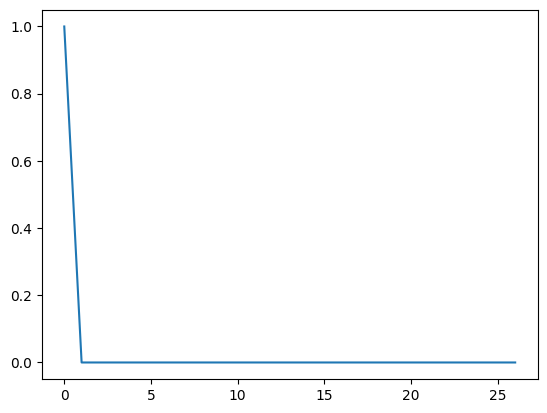

In [150]:
import matplotlib.pyplot as plt
plt.plot(list(range(df_ohe.shape[1])), pca.explained_variance_ratio_)

# Automate the porcess

In [163]:
pca1 = PCA(n_components = 0.95, random_state=7 )
pca1.fit(df_ohe)
trans_data = pca1.transform(df_ohe)
trans_data.shape

(53794, 1)

# pca on standard values

In [164]:
from sklearn.decomposition import PCA
pca=PCA(random_state=7)
pca.fit(df_ohe_std)
transform_data=pca.transform(df_ohe_std)
df_trans=pd.DataFrame(transform_data, index=df_ohe_std.index)
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-3.058123,0.670663,0.031949,-0.670523,-0.649348,0.591261,1.343664,-2.626377,-0.682840,-0.905825,...,0.986721,-0.546779,-0.122802,0.882168,0.028450,-0.108063,-0.074890,-3.895895e-13,-8.810594e-14,2.898140e-13
1,-2.747345,-3.290299,-0.589159,-1.256219,0.002014,-1.193838,-0.557928,-1.018643,-1.165411,-0.365425,...,0.012277,-0.417629,0.232957,0.814875,-0.031695,-0.036307,-0.135228,-2.734602e-13,-5.990627e-14,-9.194308e-14
2,-2.638636,-3.794478,-0.927549,0.391745,0.312877,-0.008504,-0.584911,-1.087188,-1.707677,-2.917107,...,-1.115188,-2.319815,-0.012506,0.583029,-0.094730,0.013721,-0.187177,1.308275e-13,-1.427150e-13,-1.732669e-13
3,-2.080483,-1.423959,-0.667045,-0.224476,-1.690584,0.344482,-1.408473,0.849237,-0.475733,-0.115351,...,0.684345,0.446829,0.089492,0.496635,0.051909,-0.117617,-0.041577,-2.794554e-13,-6.570025e-14,-3.592192e-14
4,-1.444960,-1.019892,1.984179,0.617751,-1.088615,0.101886,0.248492,-0.705168,0.647414,-2.133993,...,1.320464,-0.362554,-0.094711,0.955137,0.062996,-0.367933,0.124559,-4.848467e-13,-3.130788e-13,4.497902e-13


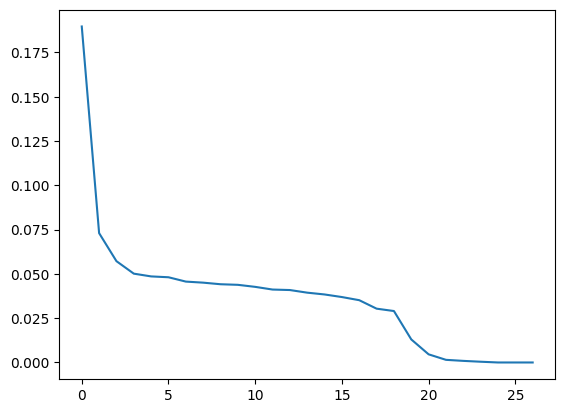

In [168]:
import matplotlib.pyplot as plt
plt.plot(list(range(df_ohe_std.shape[1])), pca.explained_variance_ratio_)

In [165]:
pca.explained_variance_ratio_ * 100

array([1.89688522e+01, 7.30254987e+00, 5.71929804e+00, 5.01443281e+00,
       4.85883935e+00, 4.81099674e+00, 4.56612589e+00, 4.50648228e+00,
       4.41685461e+00, 4.38405780e+00, 4.26880317e+00, 4.11724338e+00,
       4.08938012e+00, 3.94151065e+00, 3.83969417e+00, 3.69359999e+00,
       3.51624120e+00, 3.03801377e+00, 2.90430446e+00, 1.30128040e+00,
       4.59816200e-01, 1.49072699e-01, 9.02950036e-02, 4.22552277e-02,
       7.61816281e-13, 3.70247775e-13, 0.00000000e+00])

In [167]:
pca1 = PCA(n_components = 0.95, random_state=7 )
pca1.fit(df_ohe_std)
trans_data = pca1.transform(df_ohe_std)
trans_data.shape

(53794, 18)